In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set(style="white",color_codes=True)
plt.rcParams['figure.figsize'] = (15,9.27)
# Set the font set of the latex code to computer modern
matplotlib.rcParams['mathtext.fontset'] = "cm"

In [2]:
df = pd.read_csv('data/crashes.csv')

In [3]:
df.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
Date            5268 non-null object
Time            3049 non-null object
Location        5248 non-null object
Operator        5250 non-null object
Flight #        1069 non-null object
Route           3562 non-null object
Type            5241 non-null object
Registration    4933 non-null object
cn/In           4040 non-null object
Aboard          5246 non-null float64
Fatalities      5256 non-null float64
Ground          5246 non-null float64
Summary         4878 non-null object
dtypes: float64(3), object(10)
memory usage: 535.1+ KB


In [5]:
df.isnull().sum()

Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1706
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64

In [6]:
new_df = df.drop(['Time','Flight #','Route','cn/In','Summary','Registration'],axis=1)

In [7]:
new_df.head()

,Date,Location,Operator,Type,Aboard,Fatalities,Ground
0,09/17/1908,"Fort Myer, Virginia",Military - U.S. Army,Wright Flyer III,2.0,1.0,0.0
1,07/12/1912,"AtlantiCity, New Jersey",Military - U.S. Navy,Dirigible,5.0,5.0,0.0
2,08/06/1913,"Victoria, British Columbia, Canada",Private,Curtiss seaplane,1.0,1.0,0.0
3,09/09/1913,Over the North Sea,Military - German Navy,Zeppelin L-1 (airship),20.0,14.0,0.0
4,10/17/1913,"Near Johannisthal, Germany",Military - German Navy,Zeppelin L-2 (airship),30.0,30.0,0.0


In [8]:
new_df.isnull().sum()

Date           0
Location      20
Operator      18
Type          27
Aboard        22
Fatalities    12
Ground        22
dtype: int64

In [9]:
crash = new_df.dropna()

In [10]:
crash.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5181 entries, 0 to 5267
Data columns (total 7 columns):
Date          5181 non-null object
Location      5181 non-null object
Operator      5181 non-null object
Type          5181 non-null object
Aboard        5181 non-null float64
Fatalities    5181 non-null float64
Ground        5181 non-null float64
dtypes: float64(3), object(4)
memory usage: 323.8+ KB


In [11]:
crash['Date'] = pd.to_datetime(crash['Date'],format="%m/%d/%Y")

In [21]:
crash['year'] = crash['Date'].dt.year
crash['month'] = crash['Date'].dt.month
crash['quarter'] = crash['Date'].dt.quarter

In [22]:
crash.head()

,Date,Location,Operator,Type,Aboard,Fatalities,Ground,year,month,quarter
0,1908-09-17,"Fort Myer, Virginia",Military - U.S. Army,Wright Flyer III,2.0,1.0,0.0,1908,9,3
1,1912-07-12,"AtlantiCity, New Jersey",Military - U.S. Navy,Dirigible,5.0,5.0,0.0,1912,7,3
2,1913-08-06,"Victoria, British Columbia, Canada",Private,Curtiss seaplane,1.0,1.0,0.0,1913,8,3
3,1913-09-09,Over the North Sea,Military - German Navy,Zeppelin L-1 (airship),20.0,14.0,0.0,1913,9,3
4,1913-10-17,"Near Johannisthal, Germany",Military - German Navy,Zeppelin L-2 (airship),30.0,30.0,0.0,1913,10,4


In [28]:
fatal_by_type = crash.pivot_table(index='Type',values='Fatalities',
                  aggfunc='sum').sort_values('Fatalities',ascending=False).head(20)
fatal_by_operator = crash.pivot_table(index='Operator',values='Fatalities',
                  aggfunc='sum').sort_values('Fatalities',ascending=False).head(20)

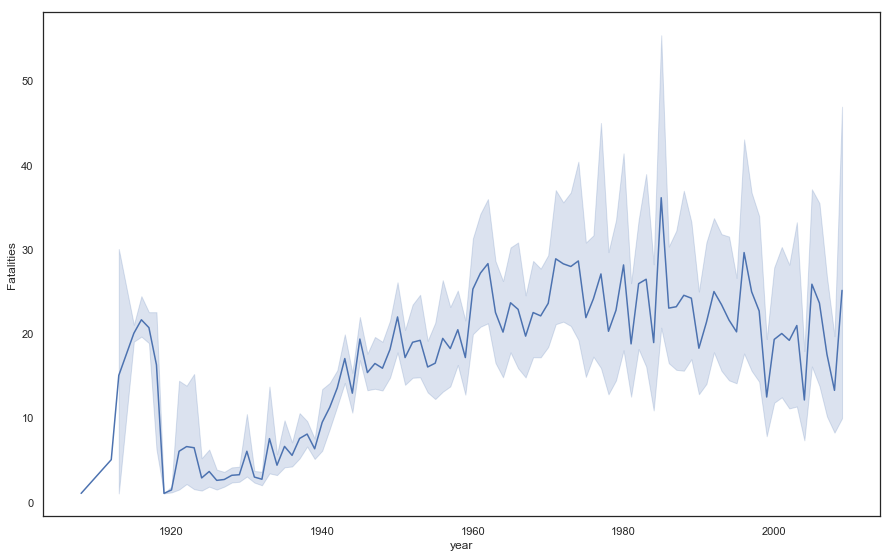

In [27]:
sns.lineplot(x='year',y='Fatalities',data=crash)